<h1><a href="https://docs.scipy.org/doc/">SciPy</a></h1>

## Integration
$$\int\limits_a^b f(x)dx = \int\limits_0^\pi \sin(x)dx$$

In [2]:
import scipy.integrate as integrate
import numpy as np
result = integrate.quad(lambda x: np.sin(x), 0, np.pi)
result

(2.0, 2.220446049250313e-14)

In [3]:
import scipy.integrate as integrate
result = integrate.romberg(lambda x: np.sin(x), 0, np.pi)
result

2.000000000001321

In [25]:
help(integrate.romberg)

Help on function romberg in module scipy.integrate.quadrature:

romberg(function, a, b, args=(), tol=1.48e-08, rtol=1.48e-08, show=False, divmax=10, vec_func=False)
    Romberg integration of a callable function or method.
    
    Returns the integral of `function` (a function of one variable)
    over the interval (`a`, `b`).
    
    If `show` is 1, the triangular array of the intermediate results
    will be printed.  If `vec_func` is True (default is False), then
    `function` is assumed to support vector arguments.
    
    Parameters
    ----------
    function : callable
        Function to be integrated.
    a : float
        Lower limit of integration.
    b : float
        Upper limit of integration.
    
    Returns
    -------
    results  : float
        Result of the integration.
    
    Other Parameters
    ----------------
    args : tuple, optional
        Extra arguments to pass to function. Each element of `args` will
        be passed as a single argument to `fun

$$\int\limits_0^\infty e^{-2x}dx$$

In [40]:
integrate.quad(lambda x:np.exp(-2*x), 0, np.inf)

(0.5, 7.735031684717554e-11)

$$\int\limits_0^2\int\limits_0^{\frac{x}{2}} dy dx$$

In [5]:
integrate.dblquad(lambda x, y: 1, 0, 2, 0, lambda x: x/2)

(1.0, 1.1102230246251565e-14)

$$\int\limits_0^\infty\int\limits_1^\infty \frac{e^{-xt}}{t^4}dt dx$$

In [6]:
from scipy import integrate
def f(t, x):
   return np.exp(-x*t) / t**4

integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(0.2500000000043577, 1.29830334693681e-08)

In [7]:
integrate.nquad(lambda t,x: np.exp(-x*t)/t**4, [[1,np.inf],[0,np.inf]])

(0.2500000000043577, 1.29830334693681e-08)

In [8]:
integrate.dblquad(lambda t,x: np.exp(-x*t)/t**4, 0, np.inf, 1, np.inf)

(0.2500000000043577, 1.29830334693681e-08)

$$\left\{\begin{array}[l]\\
  \frac{dy}{dt}=-0.5y\\
  y(0)=2\\
\end{array}\right.$$

[ 0.          0.11488132  1.26369452  3.06074656  4.85779859  6.65485062
  8.45190266 10.        ]
[[2.         1.88835583 1.0632438  0.43316531 0.17647146 0.07189444
  0.02928978 0.01350939]]


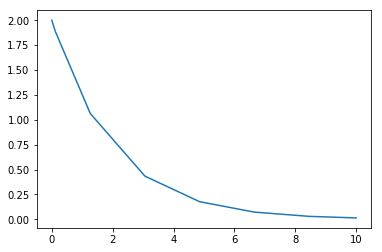

In [11]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
sol = solve_ivp(lambda t,y: -0.5*y, [0, 10], [2])
print(sol.t)
print(sol.y)
plt.plot(sol.t,sol.y[0])
plt.show()

<h1><a href="https://en.wikipedia.org/wiki/Lorenz_system">Lorenz system</a></h1>

$$\left\{\begin{array}[l]\\
\frac{dx}{dt}=\sigma(y-x)\\
\frac{dy}{dt}=x(\rho-z)-y\\
\frac{dz}{dt}=xy-\beta z\end{array}\right.$$

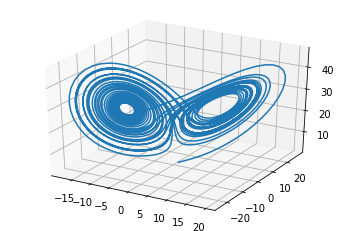

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

# Linear algebra

In [13]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
print(A)

print(linalg.inv(A)) # inversion
#check:
print(A.dot(linalg.inv(A)))

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [14]:
b = np.array([[5,6]]) #2D array
b

print(b.T) # transposition
print(b)

[[5]
 [6]]
[[5 6]]


In [15]:
print(A)
print(b)
print(A*b) #not matrix multiplication!

[[1 2]
 [3 4]]
[[5 6]]
[[ 5 12]
 [15 24]]


In [16]:
print(A.dot(b.T)) #matrix multiplication

[[17]
 [39]]


In [17]:
print(A)
print(b)

print(A.dot(b))  #impossible

[[1 2]
 [3 4]]
[[5 6]]


ValueError: shapes (2,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [18]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
print(A)
print("det(A) =",linalg.det(A))

[[1 2]
 [3 4]]
det(A) = -2.0


# Exercises

In [52]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve as fsolve

## 1. Plot functions $f(x)=2x+3$ and $g(x)=x^2$. Calculate the area between them.


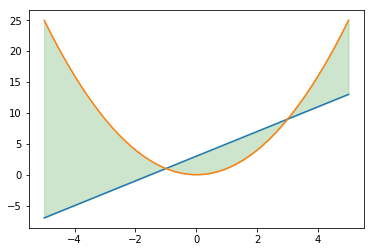

[-1.  3.]
10.666666666666664


In [54]:

x = np.linspace(-5,5)
f= 2 * x + 3
g = x * x
plt.plot(x,f)
plt.plot(x,g)
plt.fill_between(x, g,f, color='green', alpha=0.2)
plt.show()

x = fsolve(lambda x: ((2 * x) + 3) - (x * x),[-5,5])
result = integrate.romberg(lambda x: ((2 * x) + 3) - (x * x), x[0], x[1])
print (x)
print(result)

## 3. Solve the problem:
Bruce goes to shop and bought 1 bread, 2 bottles of milk and apple juice and paid 17 PLN. Next day in the same shop he paid 16 PLN for 2 breads, 1 bottle of milk and apple juice. Third day in that shop he bought 1 bread and 2 apple juices and paid 10 PLN. What was the prices of bread, milk and apple juice in that shop? Be lazy: let python calculate it for you.

In [58]:
X = np.array([[1,2,1],[2,1,1],[1,0,2]])
Y = np.array([17,16,10])
result = np.linalg.solve(X,Y)
print(result)

[4. 5. 3.]


<h2>4. <a href="https://en.wikipedia.org/wiki/Van_der_Pol_oscillator">Van der Pol oscilator</a></h2>

  $$ \left\{\begin{array}[l]\\
  \frac{dx}{dt} = y\\
    {{\frac{dy}{dt}}=\mu (1-x^{2})y-x.}\end{array}\right.$$
    $$(x(0),y(0))=(0,1)$$
    Take $\mu=1$

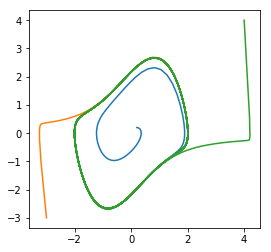

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

mu = 1

def van_der_pol_oscillator_deriv(x, t):
    nx0 = x[1]
    nx1 = -mu * (x[0] ** 2.0 - 1.0) * x[1] - x[0]
    res = np.array([nx0, nx1])
    return res

ts = np.linspace(0.0, 50.0, 500)

xs = odeint(van_der_pol_oscillator_deriv, [0.2, 0.2], ts)
plt.plot(xs[:,0], xs[:,1])
xs = odeint(van_der_pol_oscillator_deriv, [-3.0, -3.0], ts)
plt.plot(xs[:,0], xs[:,1])
xs = odeint(van_der_pol_oscillator_deriv, [4.0, 4.0], ts)
plt.plot(xs[:,0], xs[:,1])
plt.gca().set_aspect('equal')
plt.show()

<h2>7/11</h2>

In [80]:
count = 0
for i in range(1000):
    ch = np.random.choice(13,13,replace=False)
    if  True in (ch == range(13)):
        count+=1
print(1-(count/1000))
    


0.353


In [84]:
count = 0
for i in range(1000):
    ch = np.random.choice(13,13,replace=False)
    if (ch == range(13)).any():
        count+=1
print(1-(count/1000))

0.348
